Compare KMEANS "cov" to P loss

Questions:

- Is it the best to have orthogonal anchors? And if we have the example with the circle, do we want them on the edge or here? Projection optimization?

- What if we just used cosine coverage? Could that be enough to cover the space?

- How should we punish the anchors for being too close to 0,0 wihtout it being affected by the scale of the space?

- Initialize orthogonal basis vectors and rotate them to maximum coverage? Then compute them from the data?

    - Or find them using PCA? A bit harder, because that doesn't go through 0,0 necessarily.

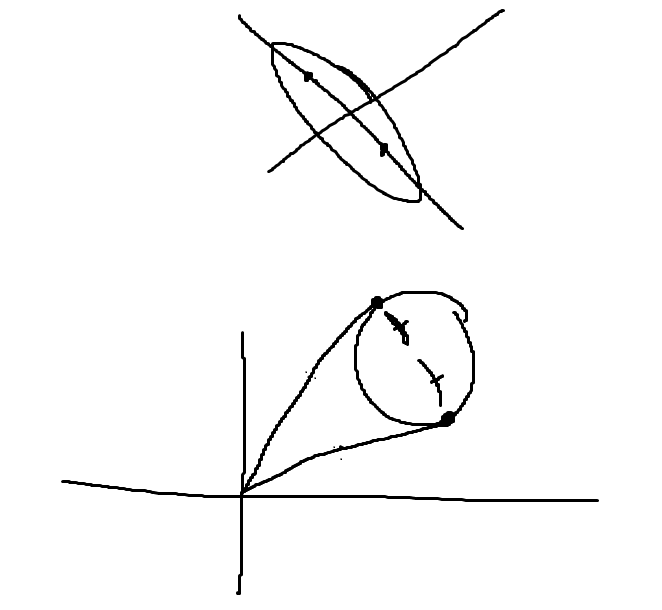

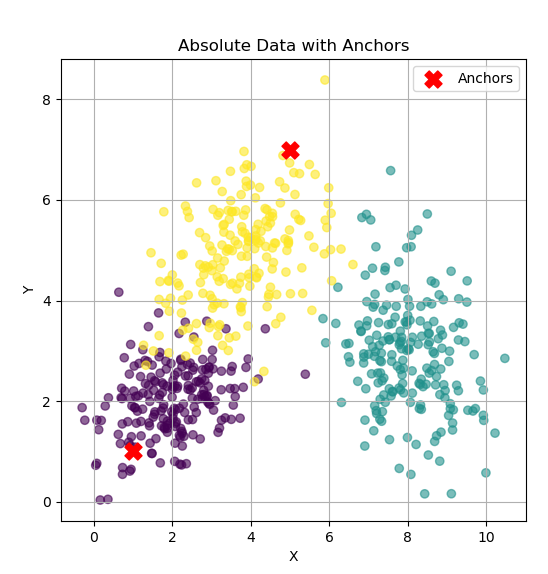

- Implement -A+P in loss function

- Check for orthogonality and rank

- Test different weights

- Try to implement Mahalonobis distance

- Cosine coverage and mahalanobis diversity?

- Plot zero-shot loss with std for rand vs P



NOTES:

- When doing projection (not normalizing) we get visually better results with AE, but then we are not invariant to scaling (mahalanobis distance or normalizing with avg. distance?).

- Mahalanobis looks to work better with more epochs

- We can't optimize P for mahalanobis since it takes up too much memory. Maybe KMEANS + mahalanobis is the way to go?

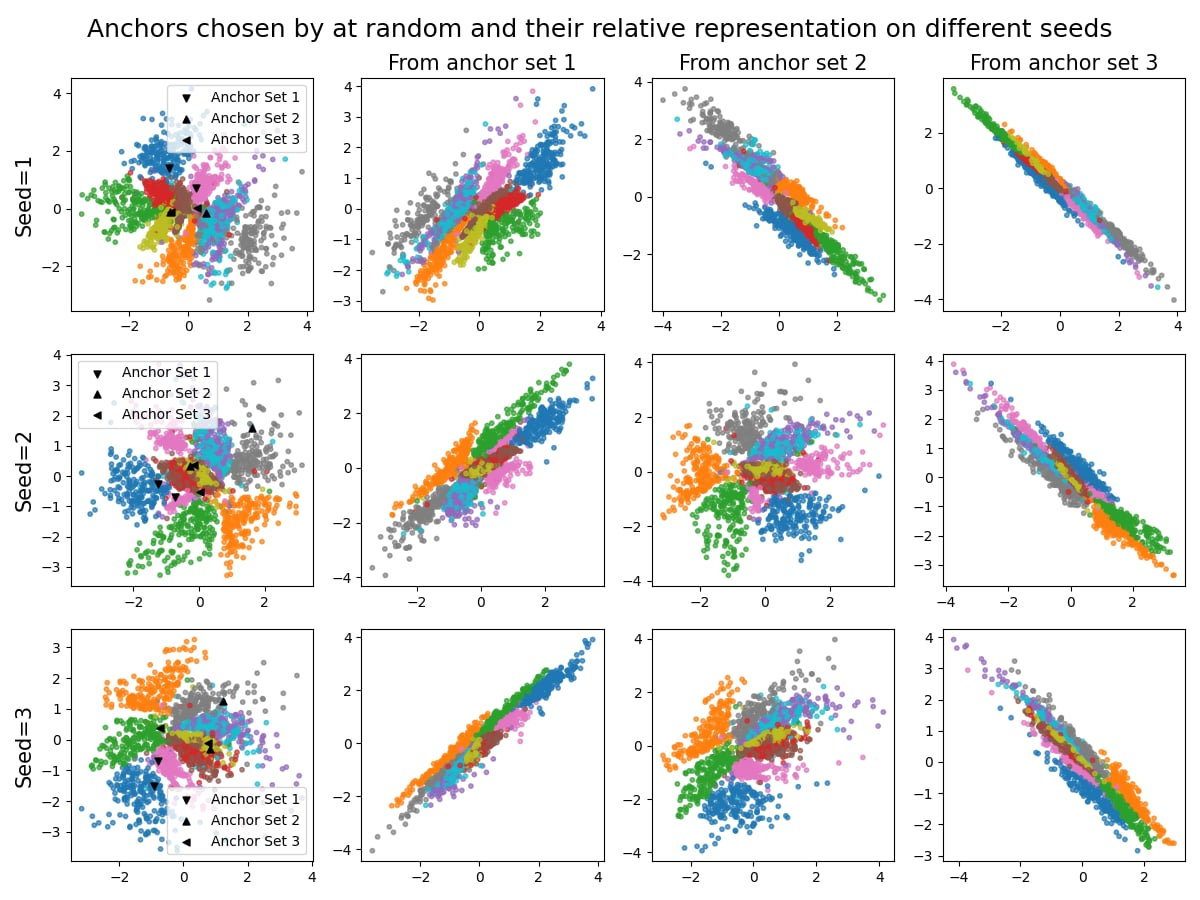

# Important notes

L=a*cov+b*div+g*convexity

conv=log(||A||)

conv=abs(1-||A||)

Can +||P|| in L replace weight regularization?

Maybe look at sigmoid or hyperbolic tangent functions as loss or scaling log with the dataset, so we reach a plateau when they make a convex pair (are on the edge and all other points fall into the polygon that they make)


Make sure that softmax in P doesn't interfere with convexity (CALL IT ANTI-COLLAPSE)

Use projection instead of cossim and euclidian after finding the optimal basis vectors?

With the logic above, can we just initialize eigenvectors and rotate them and THEN compute P (so we can translate that information to the other spaces)

Does it always make sense to have orthogonal anchors even if the space has heavy coorrelation?

Can you use PCA to find the optimal components/anchor vector directions? Is it possible to get around the problem of PCs switching between spaces?

## Watch out: In the code, we pick fewer anchors for vit small!

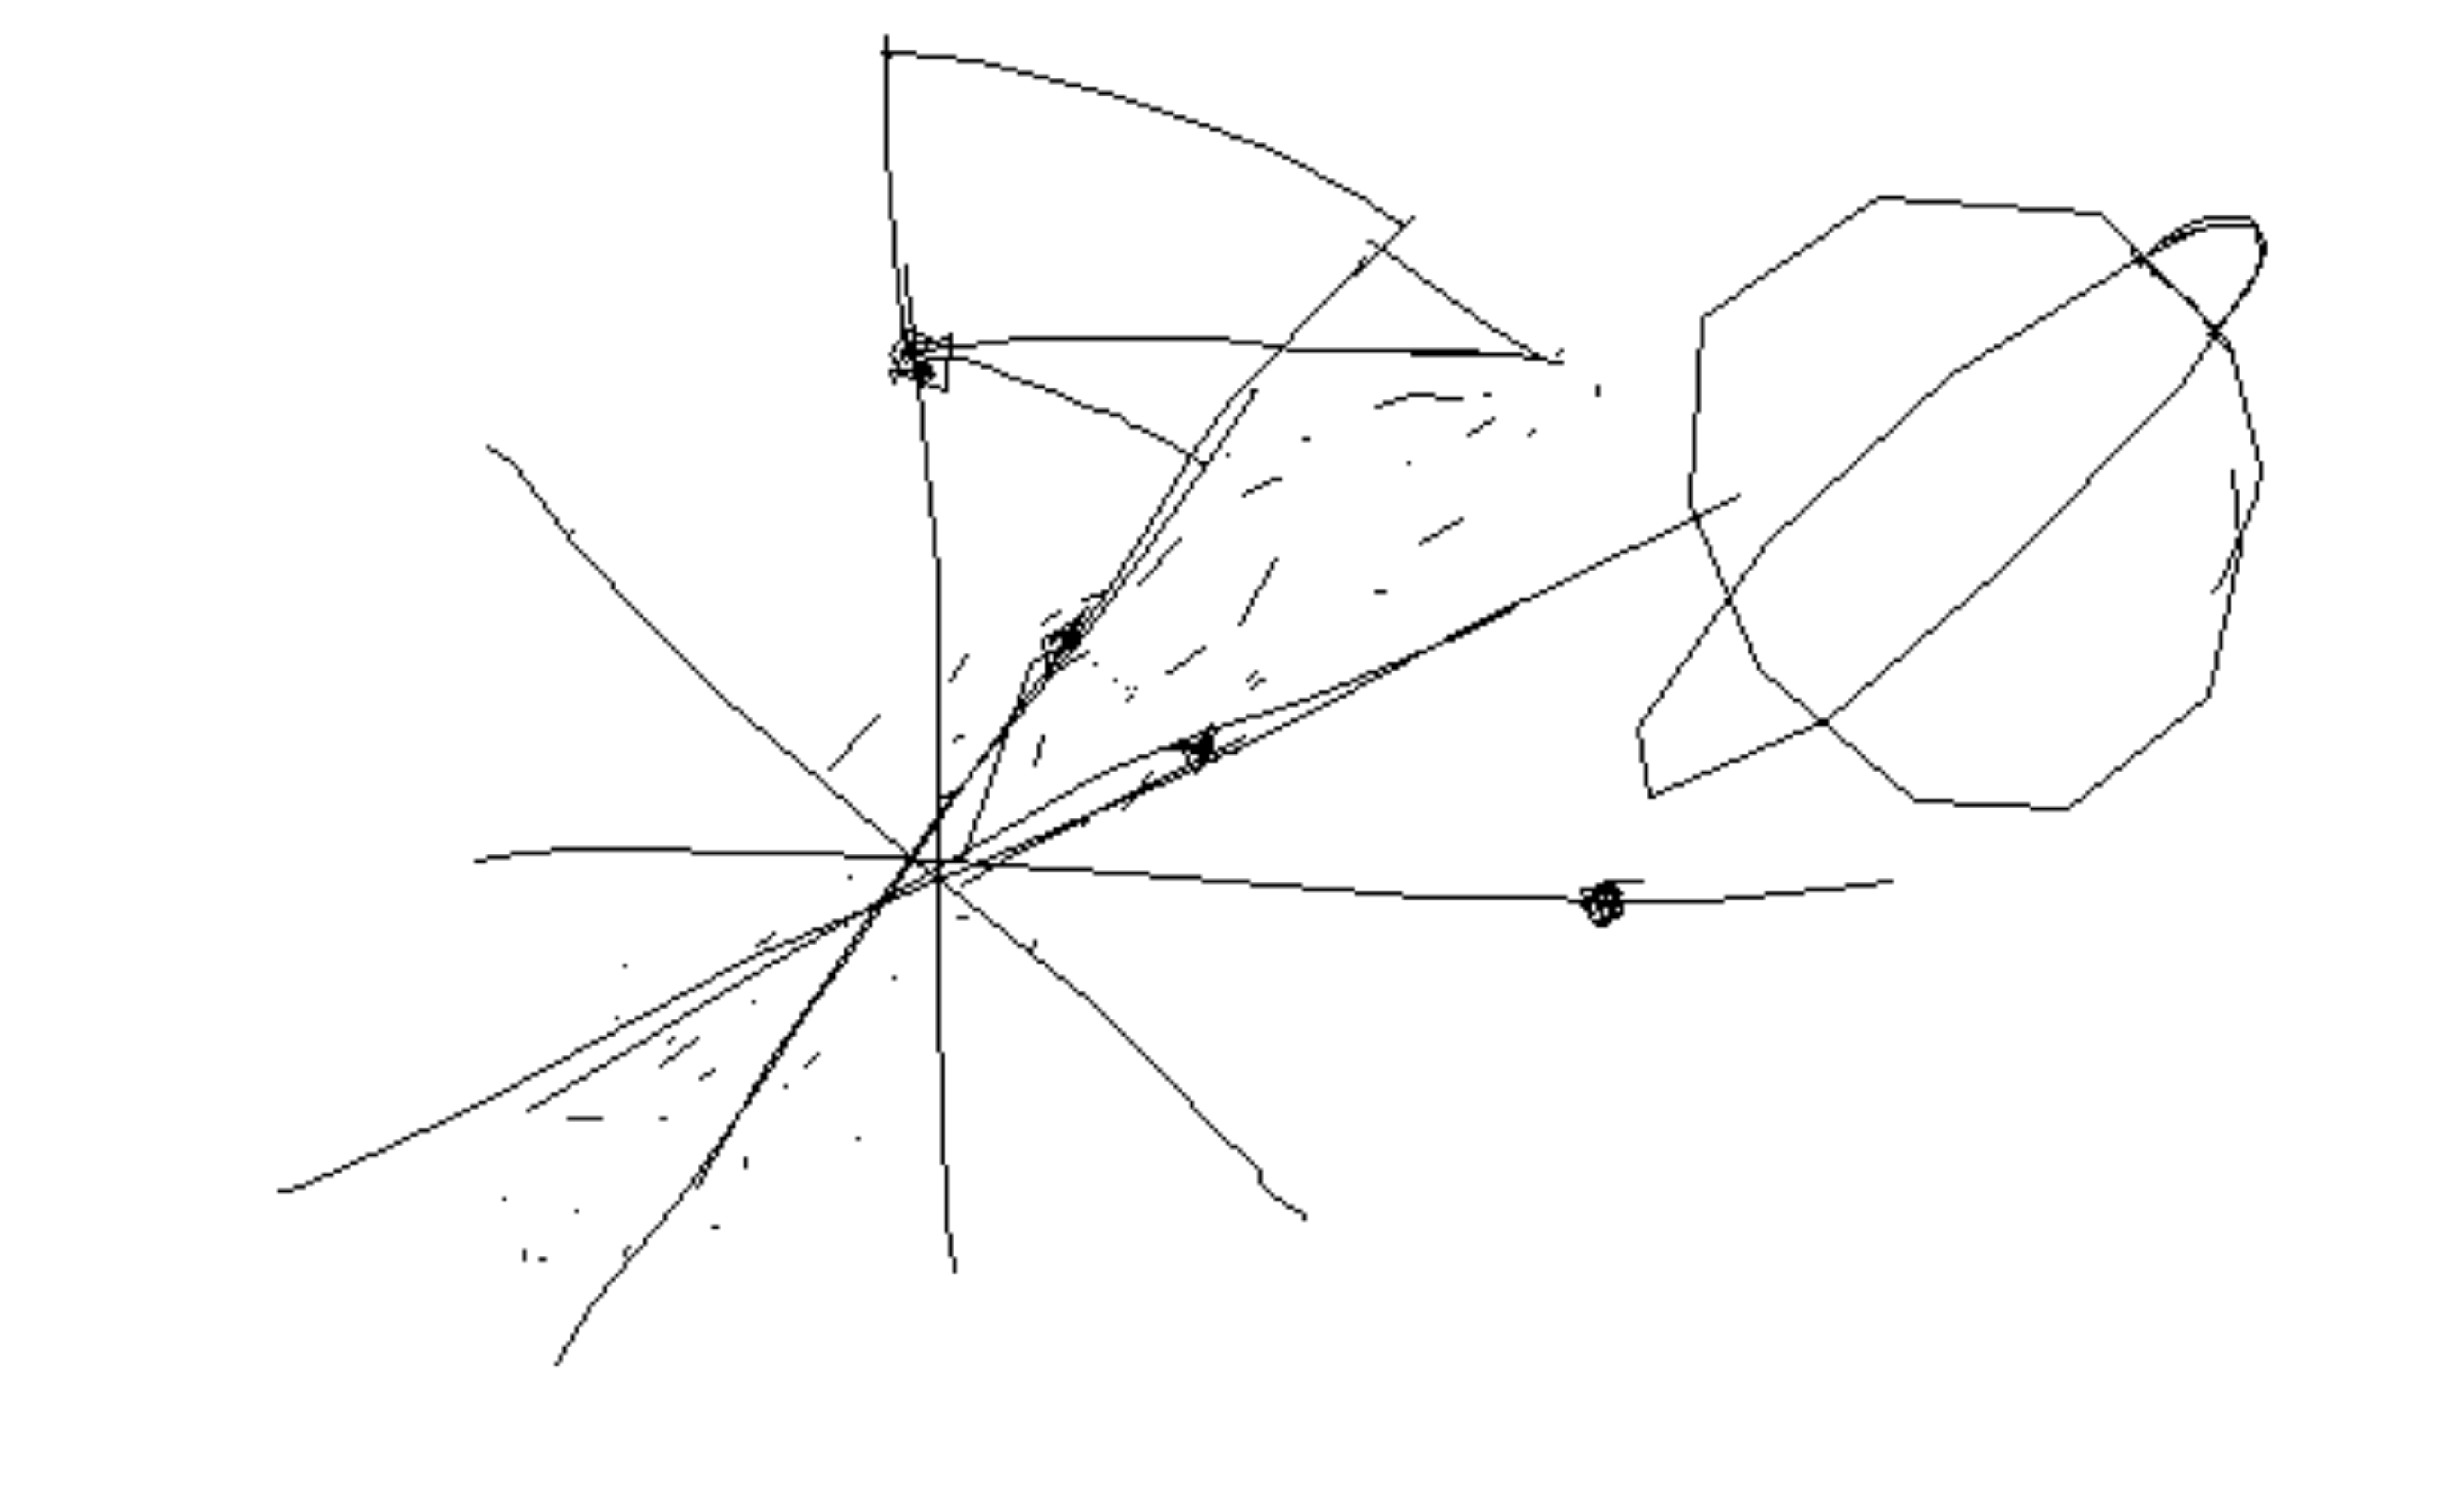

## Questions:

- It seems like greedy performs best at lower anchor numbers. Is that relevant to research into?

- Why do we get worse results than random in the specific case of vit_resnet decoder and vit-small encoder, even when training anchors on either of them.

### 24/03/2025
#### TODO:

- Make P optimize over all spaces

- Make scatterplot that compares P against random anchors to visualize robustness differences

- Make pipeline for testing relative representations on existing classifiers on CIFAR-100 and IMAGE-NET. DONE

    - Test on F1 score, smaller dataset, not softmax, eucl cos combos, optimizing over all encoders, less anchors, more anchors, more classes

fasttext found at https://fasttext.cc/docs/en/english-vectors.html, version : wiki-news-300d-1M.vec.zip

word2vec found at https://www.kaggle.com/datasets/sugataghosh/google-word2vec/data

Tests

- Cosine (remember to center the data first)

- MRR and Jaccard

- Look at their Tests

- Loss in training rel decoder

- Zero-shot stitching loss

- Qualitative reconstructions

- MSE between relative spaces

- (Word embeddings?)

## Homework for next time:

N/A

## Questions

- Scope (ECTS etc.)

- Show plots

- Distance measure

Timeline (P, anchors across spaces)

Questions

Explain our work and problems


Comparing with their results:

- Less points and compare the plots (cherry pick data hmmmmm)

- Higher dim and doing PCA



### 12/02/2025
#### **Meeting - Distance measures?**

##### **Plan for next time**

- Write down thoughts about the project, distance measures, P matrix, etc. (see notes below)

- Look through the Overleaf for the other special course

- Do explorative analysis with P matrix, noise as robustness, and using euclidian measure with BachNorm

##### **Notes**

- The diversity measure will be larger due to amount of points

- A = X * P

    - Width of P is #A, and P is picking anchors from X (only one 1 per row)

    - Either softmax p (sum to 1) - Then we have linear combinations of X as anchors

    - Or we take the highest value of another matrix J (sampling from J) columnwise to get P
        - Maybe this isn't optimal as we end up optimizing only for coverage (rewrite cov and div as depending on P to see)

        L1 los

- Why shouldnt we want to compute iteratively?

    - As long as we have a good enough first point and the #A doesnt execed #D, then it shold be ok. Make sure to place the first point properly

    - However, still takes a long time computationally

- Coverage vs div

- How do we measure at all?

    - Combining measures? Bad practice

    - Robustness in loss func. noise?

    - Try using L2 to find the anchors 

Freeze encoder, train decoder on relrep and compare loss

Just use euclidian??????? (first invariance to scaling with batchnorm)

nn.Parameter(Tensor) (for when finding A with P. Set of random points into nn)

# 09/02/2025
## Homework for next time:

N/A
#### **Relreps in higher dim and streamlining code**

- Experimenting with higher dimensional embeddings and how this translates visually to relative representations using PCA (and 2D anchors).

- Refining the AE class and dataloader to include indexes for each image in a way where we can always match parallel points (incl. anchors) in different latent spaces trained on the same data.

- Created a similarity function for quantitative similarity measures between embeddings (MRR & cosine)

- Initial work on the greedy optimization function for anchors

#### **Results**
<img src="visualization/initial_AE_testing/embeddings.png" alt="2D Latent Encodings" width="85%">


<img src="visualization/initial_AE_testing/rel_reps.png" alt="2D Latent Encodings" width="85%">

$\textbf{Interesting observation}$: Building on the previous hypothesis: We have confirmed (visually) that the relative representation will always be a n-dimensional hyper-sphere where n is the amount of anchors if n >= the latent embedding size.

##### **Plan for next time**
- Organize codebase

- Prepare for meeting

- Get similarity functions up and running

- Continue work on greedy functions

# 06/02/2025
#### **Recreating relreps paper results in 2D using MNIST**

- Creating the AE class
- Creating functions to select anchors at random and comput relative coordinates
- Running tests and plotting
- Making sure that we can create embeddings with new seeds while maintaining the same anchors

#### Results
<img src="visualization/initial_AE_testing/2D_latent_encodings.png" alt="2D Latent Encodings" width="100%">

first plot of relative representation. made from a 2D latent space using 2 anchors

<img src="visualization/initial_AE_testing/first_rel_rep_plot.png" alt="2D Latent Encodings" width="30%">

$\textbf{Interesting observation}$: Relative representations will always create a "hyper-ellipse" in some n-dimensional vector space where n is equal to the number of anchors. Because you can't change one dimension without changing the others. It is easiest to visualize in 2D, but the same rule applies for higher dimensions. Maybe this is useful somehow.
##### **Plan for next time**
- Try making a AE with higher dimensional output and making relative representation on that
- Experiment with new ways of choosing anchors
- Compare absolute and relative latent spaces between different latent spaces of MNIST
- Experiment with high-dimensional embeddings
    - PCA for visualization

### DATE
#### **TITLE**

-

#### **Results**
<img src="visualization/initial_AE_testing/embeddings.png" alt="2D Latent Encodings" width="100%">

$\textbf{Interesting observation}$: 

##### **Plan for next time**


##### **Questions**

-